In [3]:
 from googleapiclient.discovery import build
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")



In [4]:
from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()

# Get the API key
api_key = os.getenv('YOUTUBE_API_KEY')


In [5]:
channel_ids = ['UCNB-IDvDxuuiX2ghjNft5AQ','UCYKXCpJbGe3fTYILjpJgW2A','UCRRSCAz5VJQqJHAIPgFVCxw','UCP1vbe6cL3gmu6edBwUyk_A',
              'UCcegJZ-0FZcby0gsI4LAnGg','UCoJ0b8z-FS_tuissbov-UUA','UCYGgbbl6veQIN9Hn0RhVX6A','UCNzd8n4UapaAtrhC062RxDQ',
              'UCuRGQqKKdPOSPB0XG5VNk5g','UCEly_O1P_iUpOV-QjsDXccw','UCC5BuZ0T74w-01gm5BD71TQ','UCJ7kenzU8PUZVxKuE3kirEg',
              'UCJ2XnwRKT0ksT9E1lri1wlg','UCi_szzLDh7zYETJevZY0HqQ','UCBZPPYU_l99Mg6-GXm6xbMg','UCgdVgtJQXxebSiSAzlhYczw',
              'UCaTYJcqWO4Y9e_-2nsDlmYA','UCX2yZw_y5dGZyuv6zP6lajw','UClhcx_imK_zTZf4wDKsXxDg','UCFojdS6BpyQwOBeo0I2WNpQ',
              'UC_X93AYMCJ3FViwBRyP5LZg','UCaSAaM_y6bOX0DIy_Xry1Mg','UCvA_SWl8Ti3hvbmJyrLFqZQ','UCl1txXouaN3YU8zzNPJP_pA',
              'UCA-KAJf71B6_G_RFu94LB-Q','UCSlDRMidlzVI7EcEtOYQIqA','UCmBsqNZEs2KF7PfZvXLd69A','UCsmPEw8gG-tmNJn_UzKwcWA',
              'UC8NZHJl-gfDZxbBvmL0vCXQ','UCOEK9oW_VYDHbX3qwT4JMyQ','UCsYg_Sejxwi0nXe2ztzCXlw']

youtube = build('youtube', 'v3', developerKey=api_key)

**Get channel Statistics**

In [6]:
def channel_stats(youtube, channel_ids):
     
    request = youtube.channels().list(
        part='snippet,contentDetails,statistics',
        id=channel_ids)
    response = request.execute()
      
    return response

In [7]:
channel_stats(youtube, channel_ids)

{'kind': 'youtube#channelListResponse',
 'etag': 'IOeB19NX1OIO4y0Oaz31clYCl0I',
 'pageInfo': {'totalResults': 31, 'resultsPerPage': 5},
 'items': [{'kind': 'youtube#channel',
   'etag': 'dny4Nc6wG8BcIDV7ZsTijbUp67s',
   'id': 'UClhcx_imK_zTZf4wDKsXxDg',
   'snippet': {'title': 'Okello Max',
    'description': 'Okello Max alias Julius Okello McRymboh is a Kenyan musician. Well known for his prowess in Dholuo flavor in his music. He is amongst the African rising artists to watch out for. Stay locked. Don’t forget to subscribe \n',
    'customUrl': '@okellomax',
    'publishedAt': '2015-09-16T23:35:04Z',
    'thumbnails': {'default': {'url': 'https://yt3.ggpht.com/GfWU8ta9Ovs5JzNXfD_lc7ZHYrHQqzr5dN2_1Y47KvnLrnlCfwkP-s-m7-FZ48NxlpOoDCYwQnA=s88-c-k-c0x00ffffff-no-rj',
      'width': 88,
      'height': 88},
     'medium': {'url': 'https://yt3.ggpht.com/GfWU8ta9Ovs5JzNXfD_lc7ZHYrHQqzr5dN2_1Y47KvnLrnlCfwkP-s-m7-FZ48NxlpOoDCYwQnA=s240-c-k-c0x00ffffff-no-rj',
      'width': 240,
      'height':

In [10]:
def channel_stats(youtube, channel_ids):
    
    all_data = []
    
    request = youtube.channels().list(
        part='snippet,contentDetails,statistics',
        id=','.join(channel_ids))
    response = request.execute()
      
    for i in range(len(response['items'])):
        data = dict(Channel_name = response['items'][i]['snippet']['title'],
                   Subscribers = response['items'][i]['statistics']['subscriberCount'],
                   Views = response['items'][i]['statistics']['viewCount'],
                   Total_videos = response['items'][i]['statistics']['videoCount'],
                   playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads'])
        all_data.append(data)

    return all_data

In [11]:
channels_data = channel_stats(youtube, channel_ids)
channels_data

[{'Channel_name': 'Sauti Sol',
  'Subscribers': '1110000',
  'Views': '336364592',
  'Total_videos': '258',
  'playlist_id': 'UUBZPPYU_l99Mg6-GXm6xbMg'},
 {'Channel_name': 'Kagwe Mungai',
  'Subscribers': '47900',
  'Views': '7375299',
  'Total_videos': '57',
  'playlist_id': 'UUX2yZw_y5dGZyuv6zP6lajw'},
 {'Channel_name': 'Otile Brown Official',
  'Subscribers': '1490000',
  'Views': '400267938',
  'Total_videos': '108',
  'playlist_id': 'UUvA_SWl8Ti3hvbmJyrLFqZQ'},
 {'Channel_name': 'Official Masauti',
  'Subscribers': '266000',
  'Views': '38310117',
  'Total_videos': '132',
  'playlist_id': 'UUsYg_Sejxwi0nXe2ztzCXlw'},
 {'Channel_name': 'Masterpiece King',
  'Subscribers': '55000',
  'Views': '5221277',
  'Total_videos': '46',
  'playlist_id': 'UUSlDRMidlzVI7EcEtOYQIqA'},
 {'Channel_name': 'Nyashinski',
  'Subscribers': '658000',
  'Views': '149082492',
  'Total_videos': '50',
  'playlist_id': 'UUNzd8n4UapaAtrhC062RxDQ'},
 {'Channel_name': 'Femi One',
  'Subscribers': '293000',
  'V

In [12]:
mydata = pd.DataFrame(channels_data)

In [13]:
mydata

,Channel_name,Subscribers,Views,Total_videos,playlist_id
0,Sauti Sol,1110000,336364592,258,UUBZPPYU_l99Mg6-GXm6xbMg
1,Kagwe Mungai,47900,7375299,57,UUX2yZw_y5dGZyuv6zP6lajw
2,Otile Brown Official,1490000,400267938,108,UUvA_SWl8Ti3hvbmJyrLFqZQ
3,Official Masauti,266000,38310117,132,UUsYg_Sejxwi0nXe2ztzCXlw
4,Masterpiece King,55000,5221277,46,UUSlDRMidlzVI7EcEtOYQIqA
5,Nyashinski,658000,149082492,50,UUNzd8n4UapaAtrhC062RxDQ
6,Femi One,293000,28619086,115,UUYGgbbl6veQIN9Hn0RhVX6A
7,Wakadinali,425000,80989004,121,UUNB-IDvDxuuiX2ghjNft5AQ
8,Victoria Kimani,72400,13485527,118,UUcegJZ-0FZcby0gsI4LAnGg
9,SEAN MMG,93100,13200206,13,UUJ7kenzU8PUZVxKuE3kirEg


In [131]:
mydata.dtypes

Channel_name    object
Subscribers     object
Views           object
Total_videos    object
playlist_id     object
dtype: object

In [132]:
mydata['Subscribers'] = pd.to_numeric(mydata['Subscribers'])
mydata['Views'] = pd.to_numeric(mydata['Views'])
mydata['Total_videos'] = pd.to_numeric(mydata['Total_videos'])
mydata.dtypes

Channel_name    object
Subscribers      int64
Views            int64
Total_videos     int64
playlist_id     object
dtype: object

In [133]:
mydata.to_csv("KenyanArtistsData.csv", index=False)

**One with highest Number of Subscribers**

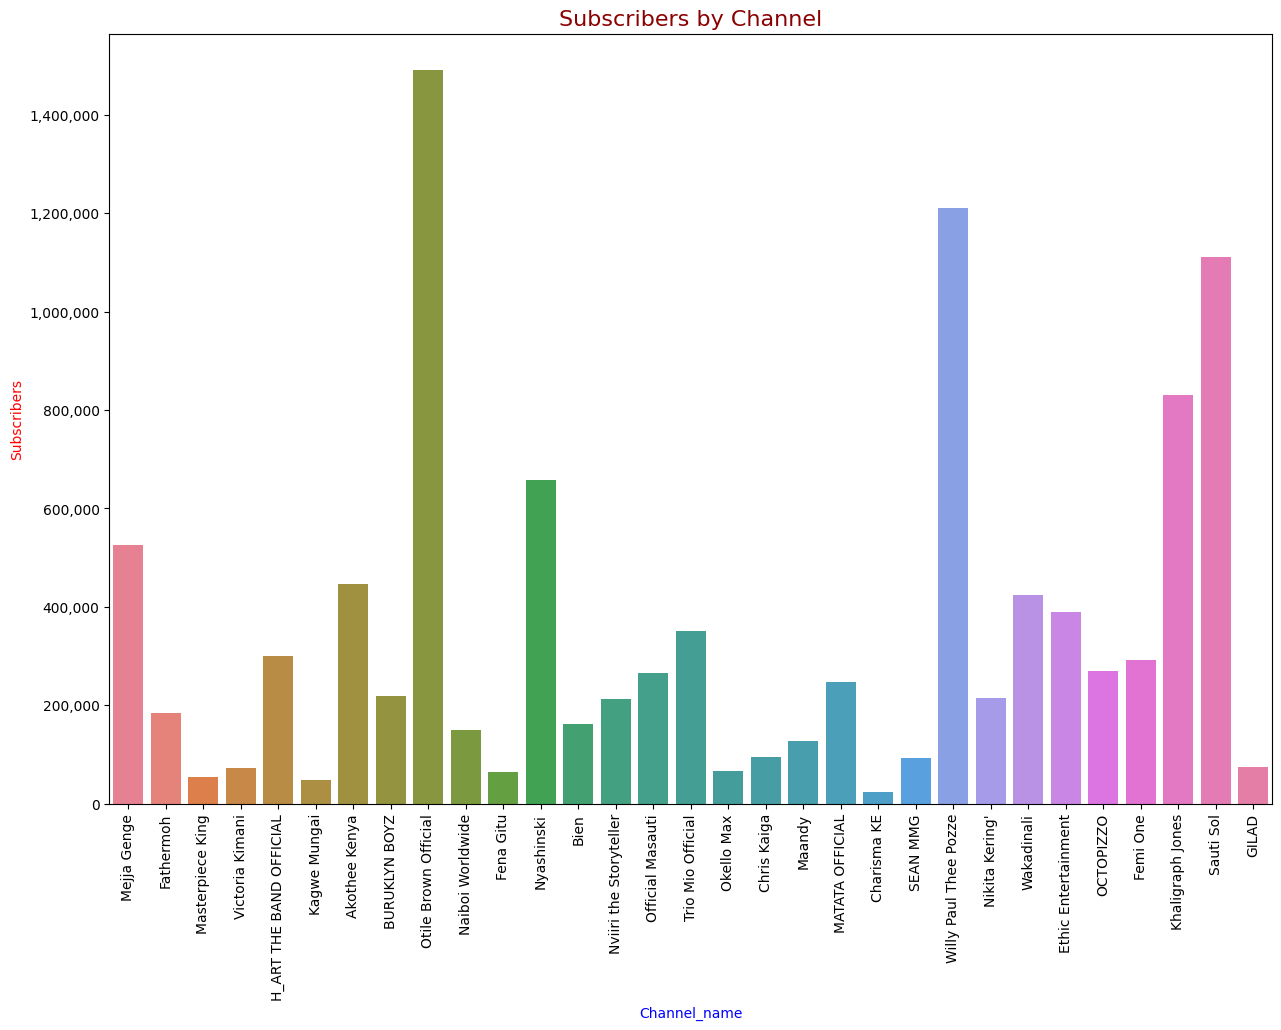

In [134]:
def format(value, tick_number):
    return f'{int(value):,}'

#sorted_data = mydata.sort_values(by='Subscribers')

plt.figure(figsize=(15,10))
plt.title('Subscribers by Channel', fontsize=16, color='darkred') 

palette = sns.color_palette("husl", len(sorted_data))

Sub = sns.barplot(x='Channel_name', y='Subscribers', data=mydata, palette=palette)

Sub.set_xlabel('Channel_name', color='blue')
Sub.set_ylabel('Subscribers', color='red')

Sub.yaxis.set_major_formatter(FuncFormatter(format))

plt.xticks(rotation=90)

plt.show()

**One with highest Number of Views**

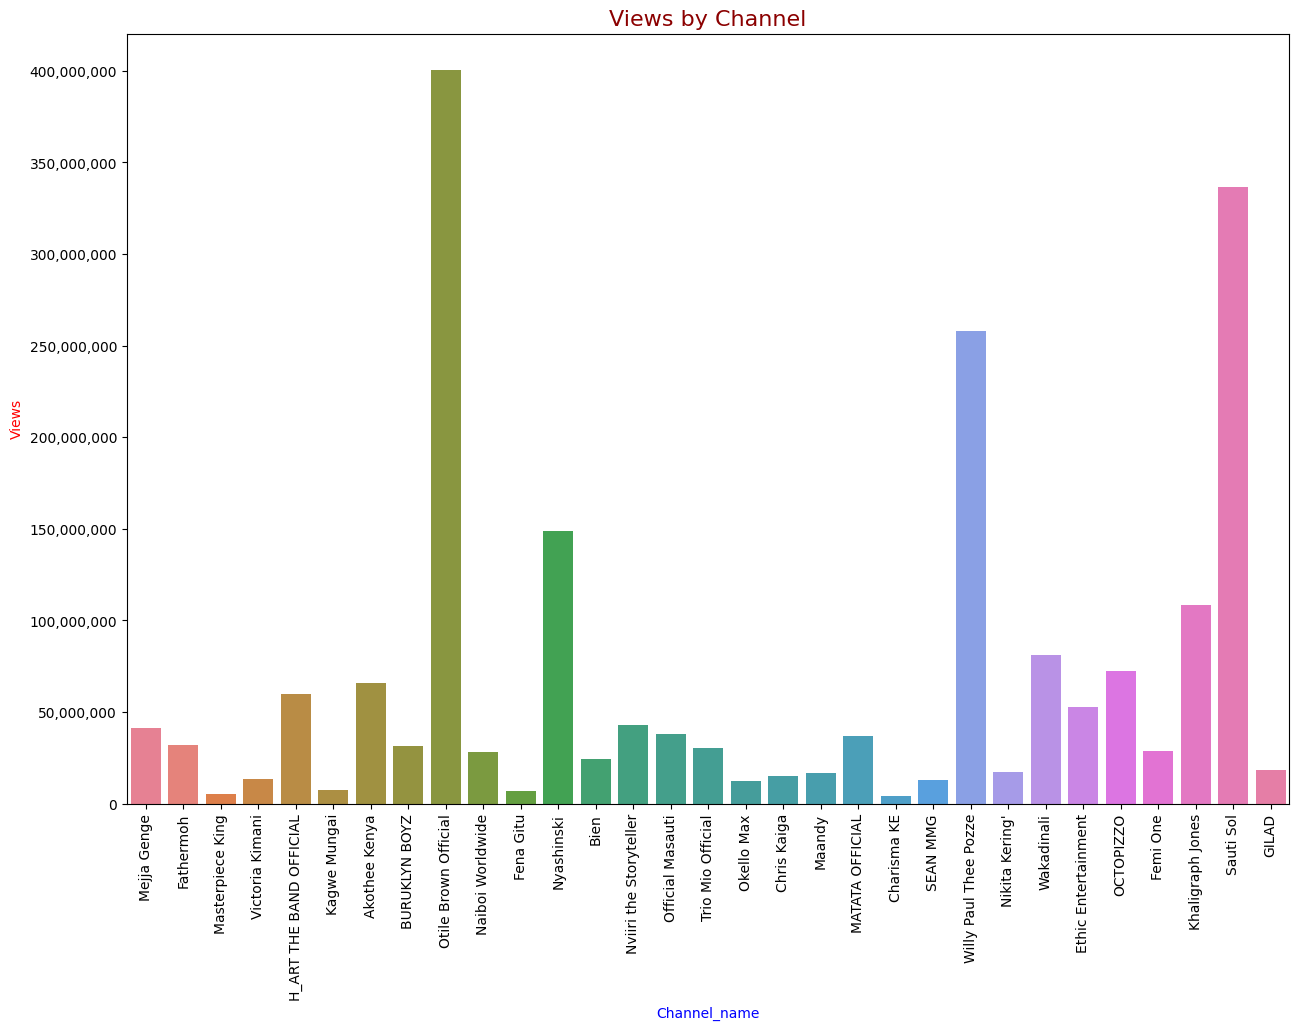

In [135]:
def format(value, tick_number):
    return f'{int(value):,}'

#sorted_data = mydata.sort_values(by='Views')

plt.figure(figsize=(15,10))
plt.title('Views by Channel', fontsize=16, color='darkred') 

palette = sns.color_palette("husl", len(sorted_data))

Sub = sns.barplot(x='Channel_name', y='Views', data=mydata, palette=palette)

Sub.set_xlabel('Channel_name', color='blue')
Sub.set_ylabel('Views', color='red')

Sub.yaxis.set_major_formatter(FuncFormatter(format))

plt.xticks(rotation=90)

plt.show()

**One with highest Number of Videos**

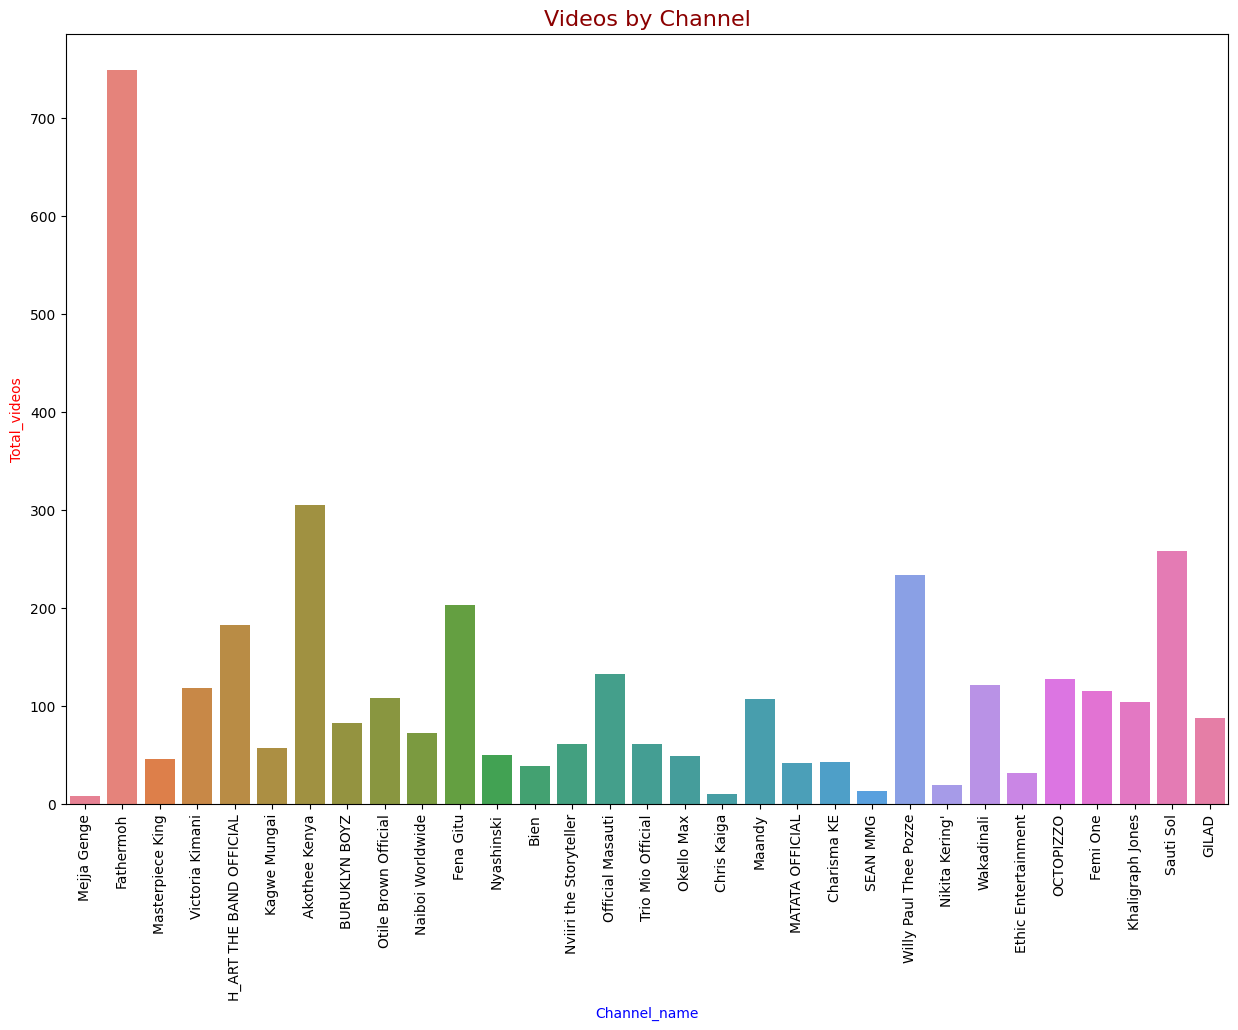

In [136]:
def format(value, tick_number):
    return f'{int(value):,}'

#sorted_data = mydata.sort_values(by='Views')

plt.figure(figsize=(15,10))
plt.title('Videos by Channel', fontsize=16, color='darkred') 

palette = sns.color_palette("husl", len(sorted_data))

Sub = sns.barplot(x='Channel_name', y='Total_videos', data=mydata, palette=palette)

Sub.set_xlabel('Channel_name', color='blue')
Sub.set_ylabel('Total_videos', color='red')

Sub.yaxis.set_major_formatter(FuncFormatter(format))

plt.xticks(rotation=90)

plt.show()

**Function to get Video ids**

In [231]:
playlist_id = mydata.loc[mydata['Channel_name']=='Wakadinali', 'playlist_id'].iloc[0]

In [232]:
playlist_id

'UUNB-IDvDxuuiX2ghjNft5AQ'

In [233]:
def get_video_ids(youtube, playlist_id):
    
    request = youtube.playlistItems().list(
        part='contentDetails',
        playlistId = playlist_id,
        maxResults = 50)
    response = request.execute()

    videos_ids = []

    for i in range(len(response['items'])):
        videos_ids.append(response['items'][i]['contentDetails']['videoId'])

    next_page_token = response.get('nextPageToken')
    more_pages = True

    while more_pages:
        if next_page_token is None:
            more_pages = False

        else:
            request = youtube.playlistItems().list(
                part='contentDetails',
                playlistId = playlist_id,
                maxResults = 50,
                pageToken = next_page_token)
            response = request.execute()

            for i in range(len(response['items'])):
                videos_ids.append(response['items'][i]['contentDetails']['videoId'])

            next_page_token = response.get('next_page_token')
                
    return videos_ids

In [234]:
video_ids = get_video_ids(youtube, playlist_id)

In [235]:
video_ids

['Y0akFVaxYiQ',
 'AL5prkLcOh0',
 'uqLdpa7XIEc',
 'i7OBX-kYyuA',
 'Ir_cPR0Zkhg',
 'QgKa0_Toz5I',
 'FvhbwZI4_ew',
 '_j-QFRVL72g',
 'qrKo4hvLJnM',
 '7iLjlP0TFmg',
 'ZRK-hDiks50',
 'zzuSzxEZ01w',
 'V5ELCS7uWDU',
 '0G2V-VVPkHI',
 'CpoSAwdkMw4',
 '2zFgUVCoVbQ',
 'm6Gom_Va7ao',
 'qkmsVOkRpP4',
 'jBVnDZiBihY',
 '0rLqU8gNams',
 'Z3L90-rSuns',
 'aCW-DycGi90',
 'k7KQwlr4RNc',
 'OVaRDiB4e78',
 'Zi_TdRR9DFU',
 'lKsc8wr3oJE',
 'gRBinmAQsr0',
 'VWRf7VKY1pk',
 'yHbvNP8GfoU',
 'nfgAJB7_Acs',
 'sAYfqxpbp-w',
 'yqYin6HVPEk',
 '6D5_Sd-dqEw',
 'mAfnLSDyHCg',
 'YqblQbOczAo',
 '0QBUjFcz_XY',
 '0XHmLqcqSj8',
 '-Y0ilYWbjE4',
 'MYnhknl_bBU',
 '4ezCtVnuegc',
 'yB7V7PbAc8w',
 'ppO8JzvI71k',
 '83Emv_YVzmA',
 'jzvZ0oFMWf4',
 '2OgFVlwin-4',
 'DfZqQguBOIk',
 'fMRUh_hNnGA',
 'Vx4hvaCqEGo',
 '5ehsbbemmII',
 'FNO62u9jh-g',
 'PwN7BkHgyoY',
 'jCv6vkJOee8',
 'fxIv96Ein7c',
 '2uWL-VcUzEE',
 '3YAn_ftYQKw',
 'PU1CY88yh3Q',
 '_JkHlwizedc',
 'Sh7EBPAjk4c',
 'JVJi5u5uFI8',
 'RVKhxJMbVkI',
 '2wxc2qy1Ev8',
 'dT6_X6EdxPs',
 'oKA-Yl

**Function to get video details**

In [236]:
def get_video_details(youtube, video_ids):
    all_video_stat = []
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
            part='snippet,statistics',
            id=','.join(video_ids[i:i+50]))
        response = request.execute()

        for video in response['items']:
            video_stats = dict(Title = video['snippet']['title'],
                              Published_date = video['snippet']['publishedAt'],
                              Views = video['statistics']['viewCount'],
                              Likes = video['statistics']['likeCount'],
                              Comments = video['statistics']['commentCount'])
            all_video_stat.append(video_stats)

    return all_video_stat

In [237]:
video_data = get_video_details(youtube, video_ids)
video_data

[{'Title': 'Wakadinali - "Tourist" Ft. Khaligraph Jones (Official Music Video)',
  'Published_date': '2024-02-29T10:59:30Z',
  'Views': '1003122',
  'Likes': '28622',
  'Comments': '2060'},
 {'Title': 'WAKADINALI - "RONG EXPERIENCE" LIVE PART 1',
  'Published_date': '2024-01-16T13:17:49Z',
  'Views': '95337',
  'Likes': '2909',
  'Comments': '199'},
 {'Title': 'Wakadinali - "Hizi Stance" (Official Music Video)',
  'Published_date': '2023-11-25T07:26:05Z',
  'Views': '6257353',
  'Likes': '52633',
  'Comments': '3087'},
 {'Title': '#RongExperience Is Coming This 15.12.2023',
  'Published_date': '2023-11-22T20:21:45Z',
  'Views': '13725',
  'Likes': '935',
  'Comments': '17'},
 {'Title': 'Wakadinali - "Mariwana" (Official Music Video)',
  'Published_date': '2023-11-22T08:18:37Z',
  'Views': '1168276',
  'Likes': '17432',
  'Comments': '1066'},
 {'Title': '#Ad #ThisIsHowWeDo music with@TuskerKenya #paidpartnershipwitheabl #kenyamilele',
  'Published_date': '2023-11-20T14:22:33Z',
  'Views

In [238]:
Details_Data = pd.DataFrame(video_data)
Details_Data

,Title,Published_date,Views,Likes,Comments
0,"Wakadinali - ""Tourist"" Ft. Khaligraph Jones (O...",2024-02-29T10:59:30Z,1003122,28622,2060
1,"WAKADINALI - ""RONG EXPERIENCE"" LIVE PART 1",2024-01-16T13:17:49Z,95337,2909,199
2,"Wakadinali - ""Hizi Stance"" (Official Music Video)",2023-11-25T07:26:05Z,6257353,52633,3087
3,#RongExperience Is Coming This 15.12.2023,2023-11-22T20:21:45Z,13725,935,17
4,"Wakadinali - ""Mariwana"" (Official Music Video)",2023-11-22T08:18:37Z,1168276,17432,1066
...,...,...,...,...,...
95,"Wakadinali ft Yung Haze, Ridik, Ares 66 - ""RYM...",2018-01-26T05:19:13Z,29096,477,42
96,"Wakadinali - ""Staki Rafiki"" (Official Audio)",2018-01-25T18:24:07Z,87967,1217,99
97,"Wakadinali ft Yung Haze - ""No Regrets"" (Offici...",2018-01-25T18:24:02Z,10464,138,13
98,"Wakadinali - ""Ujinga Ujinga"" (Official Audio)",2018-01-25T14:00:08Z,27726,427,36


In [239]:
Details_Data['Published_date'] = pd.to_datetime(Details_Data['Published_date']).dt.date
Details_Data['Views'] = pd.to_numeric(Details_Data['Views'])
Details_Data['Likes'] = pd.to_numeric(Details_Data['Likes'])
Details_Data['Comments'] = pd.to_numeric(Details_Data['Comments'])
Details_Data

,Title,Published_date,Views,Likes,Comments
0,"Wakadinali - ""Tourist"" Ft. Khaligraph Jones (O...",2024-02-29,1003122,28622,2060
1,"WAKADINALI - ""RONG EXPERIENCE"" LIVE PART 1",2024-01-16,95337,2909,199
2,"Wakadinali - ""Hizi Stance"" (Official Music Video)",2023-11-25,6257353,52633,3087
3,#RongExperience Is Coming This 15.12.2023,2023-11-22,13725,935,17
4,"Wakadinali - ""Mariwana"" (Official Music Video)",2023-11-22,1168276,17432,1066
...,...,...,...,...,...
95,"Wakadinali ft Yung Haze, Ridik, Ares 66 - ""RYM...",2018-01-26,29096,477,42
96,"Wakadinali - ""Staki Rafiki"" (Official Audio)",2018-01-25,87967,1217,99
97,"Wakadinali ft Yung Haze - ""No Regrets"" (Offici...",2018-01-25,10464,138,13
98,"Wakadinali - ""Ujinga Ujinga"" (Official Audio)",2018-01-25,27726,427,36


In [240]:
Details_Data.dtypes

Title             object
Published_date    object
Views              int64
Likes              int64
Comments           int64
dtype: object

In [241]:
top10_videos = Details_Data.sort_values(by='Views', ascending = False).head()
top10_videos

,Title,Published_date,Views,Likes,Comments
44,"Wakadinali - ""Geri Inengi"" ft SirBwoy (Officia...",2021-10-23,9825396,85997,4166
19,"Wakadinali - ""Sikutambui"" (Official Music Video)",2023-05-13,7717633,54869,2471
2,"Wakadinali - ""Hizi Stance"" (Official Music Video)",2023-11-25,6257353,52633,3087
47,"Wakadinali - ""Avoid those People"" ft. All Star...",2021-04-19,5031596,48714,3818
25,"Wakadinali - ""McMca"" (Official Music Video)",2022-10-14,4793517,44437,3044


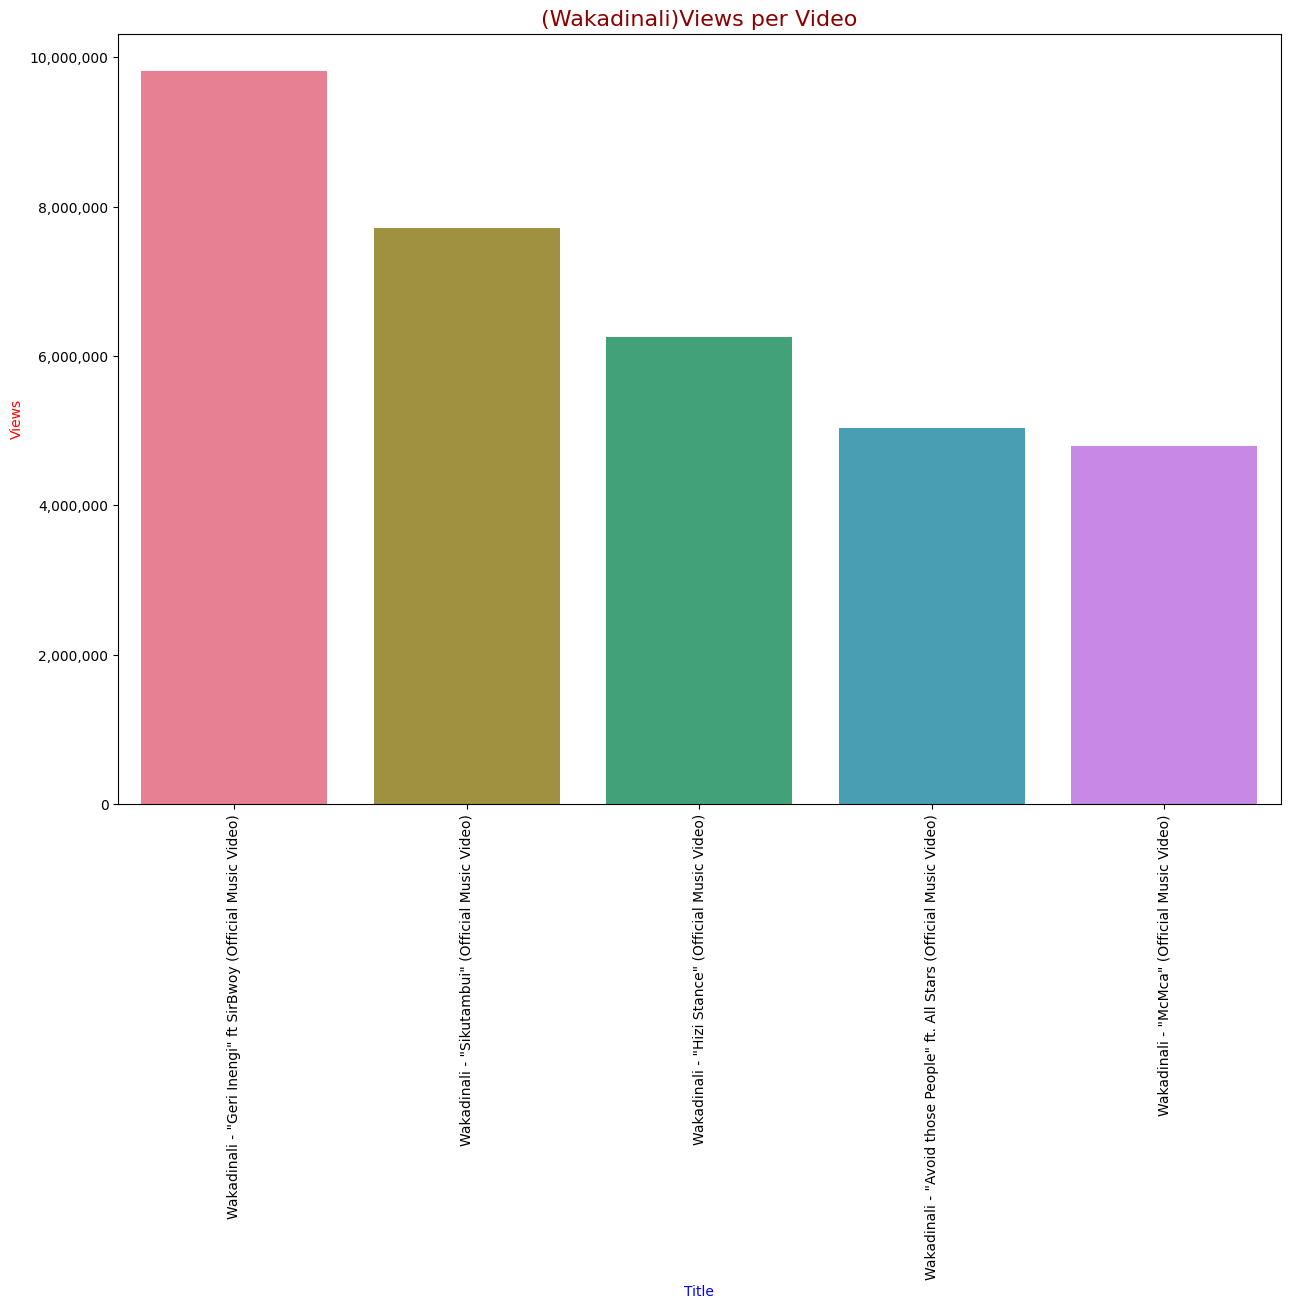

In [254]:
def format(value, tick_number):
    return f'{int(value):,}'


plt.figure(figsize=(15,10))
plt.title('(Wakadinali)Views per Video', fontsize=16, color='darkred') 

palette = sns.color_palette("husl", len(top10_videos))

Sub = sns.barplot(x='Title', y='Views', data=top10_videos, palette=palette)

Sub.set_xlabel('Title', color='blue')
Sub.set_ylabel('Views', color='red')

Sub.yaxis.set_major_formatter(FuncFormatter(format))

plt.xticks(rotation=90)

plt.show()

In [243]:
Details_Data

,Title,Published_date,Views,Likes,Comments
0,"Wakadinali - ""Tourist"" Ft. Khaligraph Jones (O...",2024-02-29,1003122,28622,2060
1,"WAKADINALI - ""RONG EXPERIENCE"" LIVE PART 1",2024-01-16,95337,2909,199
2,"Wakadinali - ""Hizi Stance"" (Official Music Video)",2023-11-25,6257353,52633,3087
3,#RongExperience Is Coming This 15.12.2023,2023-11-22,13725,935,17
4,"Wakadinali - ""Mariwana"" (Official Music Video)",2023-11-22,1168276,17432,1066
...,...,...,...,...,...
95,"Wakadinali ft Yung Haze, Ridik, Ares 66 - ""RYM...",2018-01-26,29096,477,42
96,"Wakadinali - ""Staki Rafiki"" (Official Audio)",2018-01-25,87967,1217,99
97,"Wakadinali ft Yung Haze - ""No Regrets"" (Offici...",2018-01-25,10464,138,13
98,"Wakadinali - ""Ujinga Ujinga"" (Official Audio)",2018-01-25,27726,427,36


In [244]:
Details_Data['Month'] = pd.to_datetime(Details_Data['Published_date']).dt.strftime('%b')

In [245]:
Details_Data

,Title,Published_date,Views,Likes,Comments,Month
0,"Wakadinali - ""Tourist"" Ft. Khaligraph Jones (O...",2024-02-29,1003122,28622,2060,Feb
1,"WAKADINALI - ""RONG EXPERIENCE"" LIVE PART 1",2024-01-16,95337,2909,199,Jan
2,"Wakadinali - ""Hizi Stance"" (Official Music Video)",2023-11-25,6257353,52633,3087,Nov
3,#RongExperience Is Coming This 15.12.2023,2023-11-22,13725,935,17,Nov
4,"Wakadinali - ""Mariwana"" (Official Music Video)",2023-11-22,1168276,17432,1066,Nov
...,...,...,...,...,...,...
95,"Wakadinali ft Yung Haze, Ridik, Ares 66 - ""RYM...",2018-01-26,29096,477,42,Jan
96,"Wakadinali - ""Staki Rafiki"" (Official Audio)",2018-01-25,87967,1217,99,Jan
97,"Wakadinali ft Yung Haze - ""No Regrets"" (Offici...",2018-01-25,10464,138,13,Jan
98,"Wakadinali - ""Ujinga Ujinga"" (Official Audio)",2018-01-25,27726,427,36,Jan


In [250]:
Details_Data.to_csv('wakadinali.csv', index=False)

In [251]:
Videos_monthly = Details_Data.groupby('Month', as_index=False).size()

In [252]:
Videos_monthly

,Month,size
0,Apr,4
1,Aug,4
2,Dec,12
3,Feb,5
4,Jan,15
5,Jul,8
6,Jun,6
7,Mar,19
8,May,4
9,Nov,9


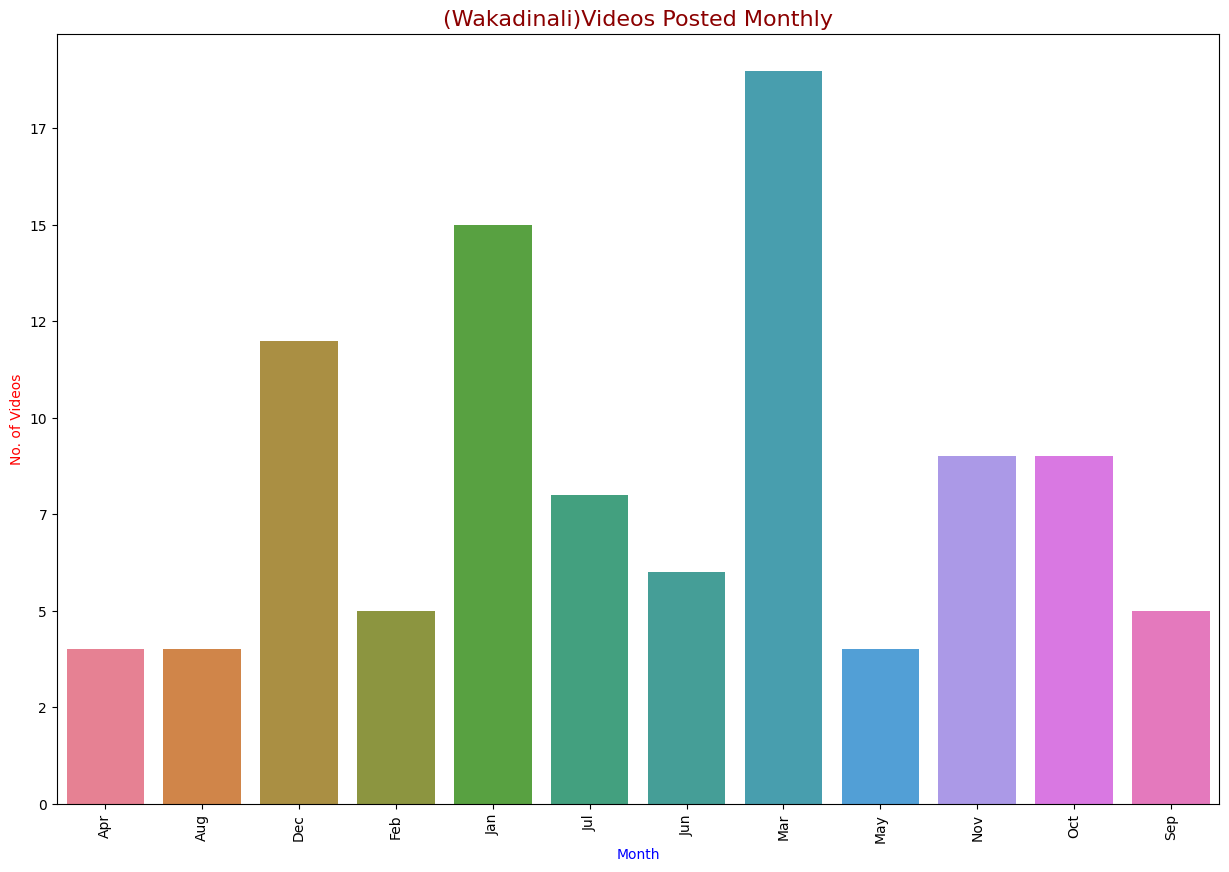

In [255]:
def format(value, tick_number):
    return f'{int(value):,}'


plt.figure(figsize=(15,10))
plt.title('(Wakadinali)Videos Posted Monthly', fontsize=16, color='darkred') 

palette = sns.color_palette("husl", len(Videos_monthly))

Sub = sns.barplot(x='Month', y='size', data=Videos_monthly, palette=palette)

Sub.set_xlabel('Month', color='blue')
Sub.set_ylabel('No. of Videos', color='red')

Sub.yaxis.set_major_formatter(FuncFormatter(format))

plt.xticks(rotation=90)

plt.show()